In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Importação dos dados do site tesourotransparente.gov
table_chunk = pd.read_csv("https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv",
sep=';', encoding='cp1252', chunksize=10000, iterator=True)

In [3]:
df = pd.concat(table_chunk, ignore_index=True)

In [4]:
df.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117610 entries, 0 to 117609
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tipo Titulo        117610 non-null  object
 1   Data Vencimento    117610 non-null  object
 2   Data Base          117610 non-null  object
 3   Taxa Compra Manha  117610 non-null  object
 4   Taxa Venda Manha   117610 non-null  object
 5   PU Compra Manha    117610 non-null  object
 6   PU Venda Manha     117610 non-null  object
 7   PU Base Manha      117610 non-null  object
dtypes: object(8)
memory usage: 7.2+ MB


In [6]:
df.head(6)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,01/03/2011,03/01/2005,"8,33","8,39","1648,58","1643,98","1643,07"
1,Tesouro IGPM+ com Juros Semestrais,01/07/2017,03/01/2005,"8,26","8,34","1501,61","1492,13","1491,30"
2,Tesouro IGPM+ com Juros Semestrais,01/04/2021,03/01/2005,"8,25","8,33","1483,52","1472,90","1472,08"
3,Tesouro IGPM+ com Juros Semestrais,01/01/2031,03/01/2005,"8,24","8,34","2510,16","2485,77","2484,40"
4,Tesouro Prefixado com Juros Semestrais,01/01/2008,03/01/2005,"17,14","17,24","849,56","847,66","847,13"
5,Tesouro Selic,16/02/2005,04/01/2005,"0,00","0,02","2165,60","2165,55","2164,15"


In [7]:
df['Tipo Titulo'].value_counts()

Tesouro IPCA+ com Juros Semestrais        32739
Tesouro Prefixado                         21856
Tesouro Prefixado com Juros Semestrais    20397
Tesouro Selic                             15626
Tesouro IGPM+ com Juros Semestrais        14539
Tesouro IPCA+                             12453
Name: Tipo Titulo, dtype: int64

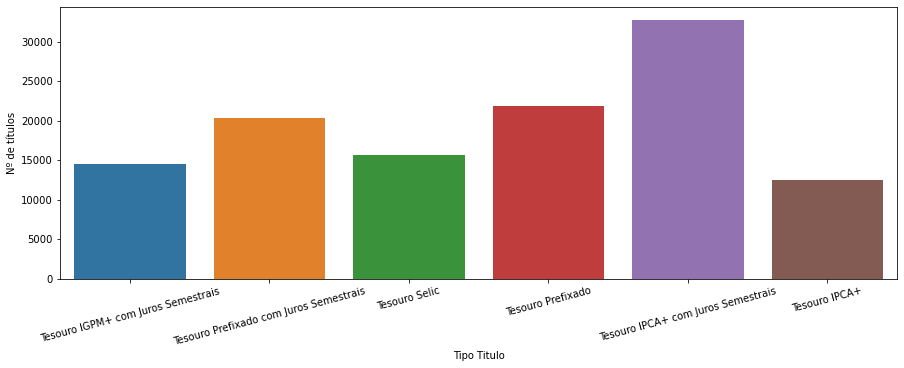

In [20]:
## Contagem dos tipos de títulos
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data = df, x='Tipo Titulo')
plt.xticks(rotation = 15)
ax.set_ylabel("Nº de títulos")
plt.show()

In [54]:
## Conversão em data
df['Data Base'] = pd.to_datetime(df["Data Base"])
df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'])

In [58]:
## Substituição de "," por "."
df['Taxa Compra Manha'] = [n.replace(",", ".") for n in df['Taxa Compra Manha']]
df['Taxa Venda Manha'] = [n.replace(",", ".") for n in df["Taxa Venda Manha"]]
df['PU Compra Manha'] = [n.replace(",", ".") for n in df['PU Compra Manha']]
df['PU Base Manha'] = [n.replace(",", ".") for n in df["PU Base Manha"]]
df['PU Venda Manha'] = [n.replace(",", ".") for n in df["PU Venda Manha"]]

In [66]:
## Converção em formato número
df['Taxa Compra Manha'] = np.float64(df['Taxa Compra Manha'])
df['Taxa Venda Manha'] = np.float64(df['Taxa Venda Manha'])
df['PU Compra Manha'] = np.float64(df['PU Compra Manha'])
df['PU Base Manha'] = np.float64(df['PU Base Manha'])
df['PU Venda Manha'] = np.float64(df['PU Venda Manha'])

In [67]:
df.head(5)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,2011-01-03,2005-03-01,8.33,8.39,1648.58,1643.98,1643.07
1,Tesouro IGPM+ com Juros Semestrais,2017-01-07,2005-03-01,8.26,8.34,1501.61,1492.13,1491.30
2,Tesouro IGPM+ com Juros Semestrais,2021-01-04,2005-03-01,8.25,8.33,1483.52,1472.90,1472.08
3,Tesouro IGPM+ com Juros Semestrais,2031-01-01,2005-03-01,8.24,8.34,2510.16,2485.77,2484.40
4,Tesouro Prefixado com Juros Semestrais,2008-01-01,2005-03-01,17.14,17.24,849.56,847.66,847.13


In [98]:
## Análise dos títulos tesouro selic, que são de remuneração diária
ts = df[df['Tipo Titulo'] == "Tesouro Selic"].groupby(by="Data Base").mean()
ts = ts.resample("M").mean()

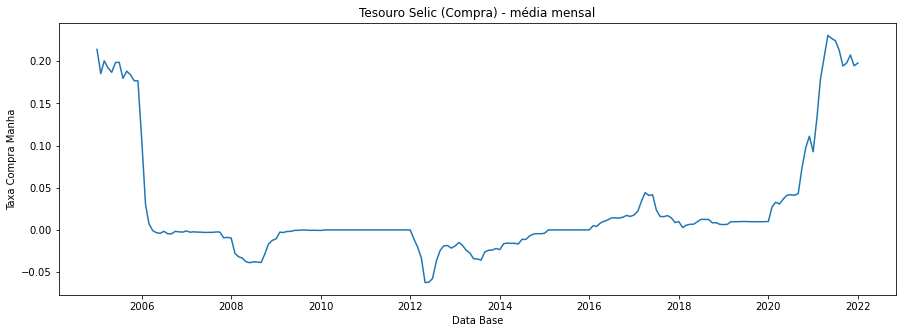

In [102]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=ts, x=ts.index, y='Taxa Compra Manha')
ax.set_title("Tesouro Selic (Compra) - média mensal")
plt.show()

In [104]:
## Análise dos títulos pré-fixados
ts = df[df['Tipo Titulo'] == "Tesouro Prefixado"].groupby(by="Data Base").mean()
ts = ts.resample("M").mean()

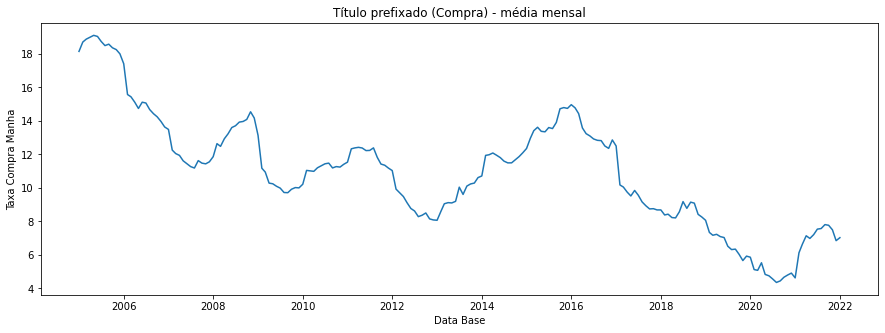

In [106]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=ts, x=ts.index, y='Taxa Compra Manha')
ax.set_title("Título prefixado (Compra) - média mensal")
plt.show()

In [108]:
## Análise dos títulos IPCA+
ts = df[df['Tipo Titulo'] == "Tesouro IPCA+"].groupby(by="Data Base").mean()
ts = ts.resample("M").mean()

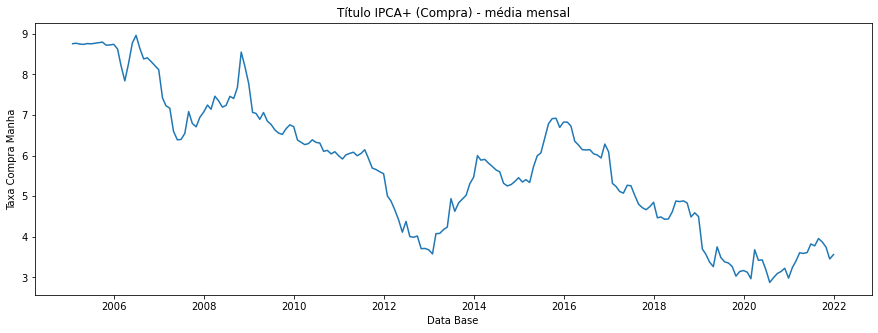

In [110]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data=ts, x=ts.index, y='Taxa Compra Manha')
ax.set_title("Título IPCA+ (Compra) - média mensal")
plt.show()